# Project: Performance Evaluation of Bandit Algorithms

- In this project, you will implement several classical bandit algorithms, evluate their performance via numerical comparison and finally gain inspiring intuition.

## Part I: Classical Bandit Algorithms

We consider a time-slotted bandit system ($t=1,2,\ldots$) with three arms.
We denote the arm set as $\{1,2,3\}$.
Pulling each arm $j$ ($ j \in \{1,2,3\}$) will obtain a random reward $r_{j}$, which follows a Bernoulli distribution with mean $\theta_{j}$, *i.e.*, Bern($\theta_{j}$).
Specifically,

\begin{equation*}
	\begin{aligned}
		r_{j} = 
		\begin{cases}
			1, & w.p.\ \theta_{j}, \\
			0, & w.p.\ 1-\theta_{j},			
		\end{cases}
	\end{aligned}
\end{equation*}
where $\theta_{j}, j \in\{1,2,3\}$ are parameters within $(0,1)$.
  
Now we run this bandit system for $N$ ($N \gg 3$) time slots.
In each time slot $t$, we choose one and only one arm from these three arms, which we denote as $I(t) \in \{1,2,3\}$.
Then we pull the arm $I(t)$ and obtain a random reward $r_{I(t)}$.
Our objective is to find an optimal policy to choose an arm $I(t)$ in each time slot $t$ such that the expectation of the aggregated reward over $N$ time slots is maximized, *i.e.*,

\begin{equation*}
	\begin{aligned}
		\max_{I(t),t = 1,\dots,N} \ \  \mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)} \right].
	\end{aligned}  	
\end{equation*}

If we know the values of $\theta_{j},j \in \{1,2,3\}$, this problem is trivial.
Since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$,

\begin{equation*}
	\begin{aligned}
		\mathbb{E}\left[\sum_{t=1}^N r_{I(t)} \right] 
		= \sum_{t=1}^{N} \mathbb{E}[r_{I(t)}] 
		= \sum_{t=1}^N \theta_{I(t)}.
	\end{aligned} 	
\end{equation*}

Let $I(t) = I^{*} = \mathop{\arg \max}\limits_{ j \in \{1,2,3\}} \ \theta_j$ for $t=1,2,\ldots,N$, then 

\begin{equation*}
	\begin{aligned}
		\max_{I(t),t=1,\ldots,N} \ \  \mathbb{E}\left[\sum_{t=1}^N r_{I(t)} \right] = N \cdot \theta_{I^*}.
	\end{aligned} 	
\end{equation*}

However, in reality, we do not know the values of $\theta_{j},j \in \{1,2,3\}$.
We need to estimate the values $\theta_{j}, j \in \{1,2,3\}$ via empirical samples, and then make the decisions in each time slot. 
Next we introduce three classical bandit algorithms: $\epsilon$-greedy, UCB, and TS, respectively.

### $\epsilon$-greedy Algorithm ($0 \leq \epsilon \leq 1$)
<img src="figures/e-greedy.jpg" width="50%" align='left'>

### UCB (Upper Confidence Bound) Algorithm
<img src="figures/UCB.jpg" width="50%" align='left'>

### TS (Thompson Sampling) Algorithm
<img src="figures/TS.jpg" width="50%" align='left'>

### Problems

1. Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N=5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_{j}, j \in \{1,2,3\}$ and oracle values are unknown to all bandit algorithms.

| Arm $j$ | 1   | 2   | 3   |
|---------|-----|-----|-----|
| $\theta_j$ | 0.7 | 0.5 | 0.4 |

**Your anwser of problem 1 in Part I**

---
# Answer of Problem 1 in Part I
---
Since each arm's parameter is oracled.

So we just need to choose the arm with the largest parameter to have the maximum expectation of aggregate rewards over $N$ time slots.

Since $\theta_1 = 0.7, \theta_2 = 0.5, \theta_3 = 0.4$,

so $\theta_1 > \theta_2 > \theta_3$,

so we choose arm 1 everytime.

i.e. $$\forall t, I(t)=I^*=\arg \max\limits_{j\in\{1,2,3\}}\theta_j=1$$
$$\theta_{I(t)} = \theta_1 = 0.7$$

Also, since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$.

So $E(r_{I(t)}) = \theta_{I(t)}$.

So the maximum expected value is 
$$\max_{I(t),t=1,2,\cdots,N}\ E\big[\sum_{t=1}^Nr_{I(t)}\big]$$
$$=\max_{I(t),t=1,2,\cdots,N}\ \sum_{t=1}^NE\big[r_{I(t)}\big]$$
$$=N \cdot \theta_{I^*} = 5000 \times 0.7 = 3500$$

So above all, with the given oracle parameters, the maximum expected value is 3500.

---

2. Implement aforemented three classical bandit algorithms with following settings: 
   
	- $N=5000$
	- $\epsilon$-greedy with $\epsilon \in \{0.1, 0.5, 0.9\}$.
	- UCB with $c \in \{1,5,10\}$.
	- TS with
    	- $\left\{(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)\right\}$ 
    	- $\left\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(a3,b3)=(2,3)\right\}$

**Your anwser of problem 2 in Part I**

---
# Answer of Problem 2 in Part I
---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random, math, copy
### Import more packages if you need

import tqdm
import matplotlib.pyplot as plt

---
# The initialization of the parameters of different algorithms

In [4]:
### Feel free to insert more blocks or helper functions if you need.

# since the arm's index are {1,2,3}
# so we need to add a 0 at index 0
# to make the index of arm's count and theta match the arm's index

theta_oracled = [0, 0.7, 0.5, 0.4] # the oracled theta of each arm

count = []
theta = []

def init_greedy():
    global count, theta
    count = [0, 0, 0, 0] # the initial count of each arm 
    theta = [0, 0, 0, 0] # the initial theta of each arm

def init_UCB():
    global count, theta
    count = [0, 1, 1, 1] # the initial count of each arm 
    theta = [0, 0, 0, 0] # the initial theta of each arm
    for t in range(1, 4):
        arm = t
        count[arm] = 1
        r_i = np.random.binomial(1, theta_oracled[arm]) # R_I(t) ~ Bern(theta_oracled[I(t)])
        theta[arm] = r_i

def init_TS():
    global count, theta
    count = [0, 0, 0, 0] # the initial count of each arm 
    theta = [0, 0, 0, 0] # the initial theta of each arm

---
# 1. The epsilon-greedy Algorithm

In [3]:
### Implementation of epsilon-Greedy:
### n is the number of time slots, epsilon is the parameter of the algorithm
### return the total reward
def greedy(n, epsilon):
    global count, theta
    init_greedy() # initialize the count and theta of each arm

    sum_theta = 0

    for t in range(1, n + 1): # the time slot
        prob = random.random() # return value is in [0, 1)
        arm = None # the arm to be chosen
        if prob < epsilon: # explore (with probability epsilon)
            arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        else: # exploit (with probability 1 - epsilon)
            arm = np.argmax(theta) # choose the best arm
            if arm == 0: # if this happened, it means that all the theta are 0
                # so we can randomly choose an arm from {1,2,3}
                arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        
        # print("time slot: ", t, " arm: ", arm)
        sum_theta += theta[arm] # update the sum of theta
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

---
# 2. The UCB Algorithm

In [32]:
### Implementation of UCB Algorithm:
### n is the number of time slots, c is the parameter of the algorithm
### return the total reward
def UCB(n, c):
    global count, theta
    init_UCB() # initialize the count and theta of each arm
    sum_theta = theta[1] + theta[2] + theta[3]
    
    for t in range(4, n + 1):
        arm = np.argmax([theta[i] + c * math.sqrt(2 * math.log(t) / count[i]) for i in range(1, 4)]) + 1
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])
        
        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
        sum_theta += theta[arm]

    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

---
# 3. The Thompson Sampling Algorithm

In [16]:
### Implementation of TS Algorithm
### n is the number of time slots, a and b are the parameters of the algorithm
### return the total reward
def TS(n, a, b):
    global count, theta
    init_TS()
    reward = 0 # the expectation of the reward
    sum_theta = 0 # the sum of theta
    max_theta = 0 # the max theta

    for t in range(1, n + 1):
        for i in range(1, 4):
            theta[i] = np.random.beta(a[i], b[i]) # theta[i] ~ Beta(a[i], b[i])
        arm = np.argmax(theta[1:4]) + 1 # choose the best arm
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        a[arm] += r_i # update a[arm]
        b[arm] += 1 - r_i # update b[arm]

        reward += r_i # update the expectation of the reward
        sum_theta += theta[arm] # update the sum of theta
        max_theta = np.max([max_theta, np.max(theta[1:4])]) # update the max theta
    
    regret = n * max_theta - sum_theta # the regret
    return reward, regret # return the total reward and regret

3. Regard each of the above setting in problem 2 of Part I as an experiment (in total $8$ experiments).
Run each experiment $200$ independent trials (change the random seed).
Plot the final result (in terms of rewards and regrets) averaged over these $200$ trials.

**Your anwser of problem 3 in Part I**

---
# Answer of Problem 3 in Part I
---
# settings

In [5]:
N = 5000
repeat_time = 200

# 1. The epsilon-greedy Algorithm
---

In [7]:
### Your code for problem 1.3. Feel free to insert more blocks or helper functions if you need.

epsilon = [0.1, 0.5, 0.9]
rewards = [0, 0, 0]
regrets = [0, 0, 0]

for i in range(3):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = greedy(N, epsilon[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:07<00:00, 27.04it/s]


epsilon =  0.1  reward =  3401.039999999999  regret =  96.25954669680347
epsilon =  0.5  reward =  3081.265000000001  regret =  418.0533831467074
epsilon =  0.9  reward =  2749.7150000000024  regret =  755.1482363262036


([<matplotlib.axis.XTick at 0x18ff379f370>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

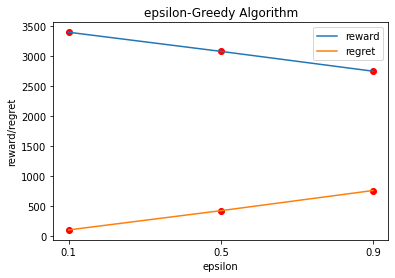

In [9]:
# plot the result
for i in range(len(epsilon)):
    print("epsilon = ", epsilon[i], " reward = ", rewards[i], " regret = ", regrets[i])

plt.plot(epsilon,rewards)
plt.plot(epsilon,regrets)
plt.scatter(epsilon, rewards, c = 'red')
plt.scatter(epsilon, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("epsilon")
plt.ylabel("reward/regret")
plt.title("epsilon-Greedy Algorithm")
plt.xticks(epsilon)

# further exploration of the epsilon-greedy Algorithm
To have a further exploration on the epsilon-greedy Algorithm,

we can set the epsilon to be a function of time.

i.e.

1. inverse ratio: $\epsilon(t) = \dfrac{1}{t}$

2. linear: $\epsilon(t) = 1 - \dfrac{t - 1}{N - 1}$

3. the logarithmic function: $\epsilon(t) = \dfrac{1}{\log(t)+1}$

4. the exponential function: $\epsilon(t) = 0.98^t$

And we can put them into experiment to test the performance of the epsilon-greedy Algorithm.

In [5]:
def greedy_function(n, epsilon): # same as the original greedy algorithm
                        # but the epsilon is a function epsilon(t)
    global count, theta
    init_greedy() # initialize the count and theta of each arm

    sum_theta = 0

    for t in range(1, n + 1): # the time slot
        prob = random.random() # return value is in [0, 1)
        arm = None # the arm to be chosen
        if prob < epsilon[t]: # explore (with probability epsilon)
            arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        else: # exploit (with probability 1 - epsilon)
            arm = np.argmax(theta) # choose the best arm
            if arm == 0: # if this happened, it means that all the theta are 0
                # so we can randomly choose an arm from {1,2,3}
                arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        
        # print("time slot: ", t, " arm: ", arm)
        sum_theta += theta[arm] # update the sum of theta
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

In [14]:
epsilon_inverse = [0] + [1 / t for t in range(1, N + 1)]
epsilon_linear = [0] + [1 - 1 / (N - 1) * (t - 1) for t in range(1, N + 1)]
epsilon_log = [0] + [1 / (1 + math.log(t)) for t in range(1, N + 1)]
epsilon_exp = [0] + [0.98 ** t for t in range(1, N + 1)]

epsilon = [epsilon_inverse, epsilon_linear, epsilon_log, epsilon_exp]

rewards = [0, 0, 0, 0]
regrets = [0, 0, 0, 0]

for i in range(4):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = greedy_function(N, epsilon[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:10<00:00, 18.53it/s]


1. inverse ratio:
   epsilon(t) = 1 / t
   reward =  3293.8100000000004 
   regret =  15.908469515101356 

2. linear:
   epsilon(t) = 1 - 1 / (N - 1) * (t - 1)
   reward =  3080.3550000000005 
   regret =  414.92228599960885 

3. the logarithmic function:
   epsilon(t) = 1 / (1 + log(t))
   reward =  3396.245000000001 
   regret =  105.6549611319986 

4. the exponential function:
   epsilon(t) = 0.98 ^ t
   reward =  3468.9649999999992 
   regret =  6.458722511804319 



([<matplotlib.axis.XTick at 0x1b4d66e4e50>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

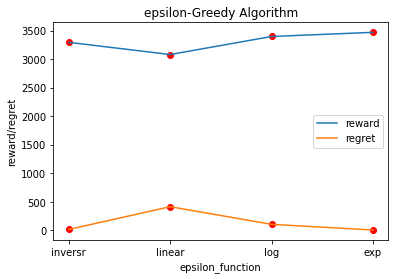

In [25]:
# plot the result
print("1. inverse ratio:\n   epsilon(t) = 1 / t\n   reward = ", rewards[0], "\n   regret = ", regrets[0], "\n")
print("2. linear:\n   epsilon(t) = 1 - 1 / (N - 1) * (t - 1)\n   reward = ", rewards[1], "\n   regret = ", regrets[1], "\n")
print("3. the logarithmic function:\n   epsilon(t) = 1 / (1 + log(t))\n   reward = ", rewards[2], "\n   regret = ", regrets[2], "\n")
print("4. the exponential function:\n   epsilon(t) = 0.98 ^ t\n   reward = ", rewards[3], "\n   regret = ", regrets[3], "\n")

epsilon_name = ['inversr', 'linear', 'log', 'exp']
plt.plot(epsilon_name,rewards)
plt.plot(epsilon_name,regrets)
plt.scatter(epsilon_name, rewards, c = 'red')
plt.scatter(epsilon_name, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("epsilon_function")
plt.ylabel("reward/regret")
plt.title("epsilon-Greedy Algorithm")
plt.xticks(epsilon_name)

---
# 2. The UCB Algorithm

In [34]:
c = [1, 5, 10]
rewards = [0, 0, 0]
regrets = [0, 0, 0]

for i in range(3):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = UCB(N, c[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:13<00:00, 14.62it/s]


c =  1  reward =  3405.9050000000025  regret =  82.04944510479272
c =  5  reward =  2981.59  regret =  516.573424366621
c =  10  reward =  2826.27  regret =  672.8341245829002


([<matplotlib.axis.XTick at 0x1ed85554d30>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

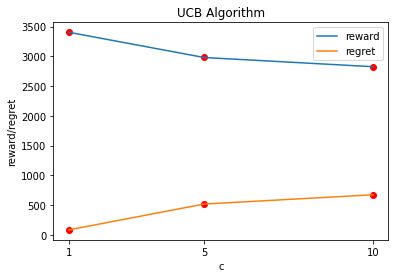

In [35]:
# plot the result
for i in range(len(c)):
    print("c = ", c[i], " reward = ", rewards[i], " regret = ", regrets[i])

plt.plot(c,rewards)
plt.plot(c,regrets)
plt.scatter(c, rewards, c = 'red')
plt.scatter(c, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("c")
plt.ylabel("reward/regret")
plt.title("UCB Algorithm")
plt.xticks(c)

# further exploration of the UCB Algorithm

To have a further exploration on the UCB Algorithm,

we can set the c to be a function of time.

i.e.

1. inverse ratio: $c(t) = 1 + \dfrac{1}{t}$

2. linear: $c(t) = 10 - \dfrac{9(t - 1)}{N - 1}$

3. the logarithmic function: $c(t) = 1 + \dfrac{1}{\log(t)+1}$

4. the exponential function: $c(t) = 1 + 0.95^t$

And we can put them into experiment to test the performance of the UCB Algorithm.

The functions' setting are very samilar to those in the epsilon-greedy algorthm, however, we added a limitation that $c\geq 1$ must always holds. This is to make sure we have enough exploration in the early stage of the experiment.

In [4]:
def UCB_function(n, c):
    global count, theta
    init_UCB() # initialize the count and theta of each arm
    sum_theta = theta[1] + theta[2] + theta[3]
    
    for t in range(4, n + 1):
        arm = np.argmax([theta[i] + c[t] * math.sqrt(2 * math.log(t) / count[i]) for i in range(1, 4)]) + 1
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])
        
        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
        sum_theta += theta[arm]

    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

In [12]:
c_inverse = [0] + [1 + 1 / t for t in range(1, N + 1)]
c_linear = [0] + [10 - 9 / (N - 1) * (t - 1) for t in range(1, N + 1)]
c_log = [0] + [1 + 1 / (1 + math.log(t)) for t in range(1, N + 1)]
c_exp = [0] + [1 + 0.95 ** t for t in range(1, N + 1)]

c = [c_inverse, c_linear, c_log, c_exp]

rewards = [0, 0, 0, 0]
regrets = [0, 0, 0, 0]

import tqdm 
for i in range(4):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = UCB_function(N, c[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:14<00:00, 14.14it/s]


1. inverse ratio:
   c(t) = 1 + 1 / t
   reward =  3408.110000000001 
   regret =  84.73971904110107 

2. linear:
   c(t) = 10 - 9 / (N - 1) * (t - 1)
   reward =  3156.984999999999 
   regret =  338.3313144129357 

3. the logarithmic function:
   c(t) = 1 + 1 / (1 + log(t))
   reward =  3396.215000000001 
   regret =  107.7315133377539 

4. the exponential function:
   c(t) = 1 + 0.98 ^ t
   reward =  3411.184999999999 
   regret =  84.46226253149558 



([<matplotlib.axis.XTick at 0x209a49be820>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

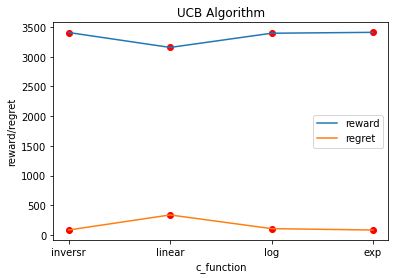

In [13]:
# plot the result
print("1. inverse ratio:\n   c(t) = 1 + 1 / t\n   reward = ", rewards[0], "\n   regret = ", regrets[0], "\n")
print("2. linear:\n   c(t) = 10 - 9 / (N - 1) * (t - 1)\n   reward = ", rewards[1], "\n   regret = ", regrets[1], "\n")
print("3. the logarithmic function:\n   c(t) = 1 + 1 / (1 + log(t))\n   reward = ", rewards[2], "\n   regret = ", regrets[2], "\n")
print("4. the exponential function:\n   c(t) = 1 + 0.95 ^ t\n   reward = ", rewards[3], "\n   regret = ", regrets[3], "\n")

c_name = ['inversr', 'linear', 'log', 'exp']
plt.plot(c_name,rewards)
plt.plot(c_name,regrets)
plt.scatter(c_name, rewards, c = 'red')
plt.scatter(c_name, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("c_function")
plt.ylabel("reward/regret")
plt.title("UCB Algorithm")
plt.xticks(c_name)

---
# 3. The Thompson Sampling Algorithm

In [31]:
a = [[0, 1, 1, 1], [0, 601, 401, 2]]
b = [[0, 1, 1, 1], [0, 401, 601, 3]]

rewards = [0, 0]
regrets = [0, 0]
for i in range(2):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = TS(N, a[i], b[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:35<00:00,  5.70it/s]


alpha = [1, 1, 1]     beta = [1, 1, 1]      reward =  3497.070000000002  regret =  39.02128959851645
alpha = [601, 401, 2] beta = [401, 601, 3]  reward =  3499.620000000002  regret =  23.78772822924203


([<matplotlib.axis.XTick at 0x2f4b0280e50>,
 [Text(0, 0, ''), Text(0, 0, '')])

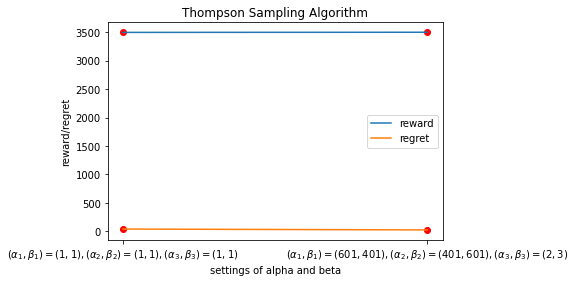

In [32]:
### Your code for problem 1.4. Feel free to insert more blocks or helper functions if you need.
print("alpha = [1, 1, 1]     beta = [1, 1, 1]      reward = ", rewards[0], " regret = ", regrets[0])
print("alpha = [601, 401, 2] beta = [401, 601, 3]  reward = ", rewards[1], " regret = ", regrets[1])

x = [r"$(a1,b1)=(1,1),(\alpha_2,\beta_2)=(1,1),(a3,b3)=(1,1)$",r"$(a1,b1)=(601,401),(\alpha_2,\beta_2)=(401,601),(a3,b3)=(2,3)$"]
plt.plot(x,rewards)
plt.plot(x,regrets)
plt.scatter(x, rewards, c = 'red')
plt.scatter(x, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("settings of alpha and beta")
plt.ylabel("reward/regret")
plt.title("Thompson Sampling Algorithm")
plt.xticks(x)

# further exploration of the Thompson Sampling Algorithm




In [19]:
a = [[0, 1001, 505, 1], [0, 801, 201, 201]]
b = [[0, 1, 505, 1001], [0, 201, 801, 501]]

rewards = [0, 0]
regrets = [0, 0]
import tqdm
for i in range(2):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = TS(N, a[i], b[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:32<00:00,  6.07it/s]


alpha = [1001, 505, 1] beta = [1, 505, 1001]    reward =  3501.8  regret =  20.564764764082966
alpha = [801, 201, 201] beta = [201, 801, 501]  reward =  3502.310000000001  regret =  17.802466848076552


([<matplotlib.axis.XTick at 0x209ab785280>,
 [Text(0, 0, ''), Text(0, 0, '')])

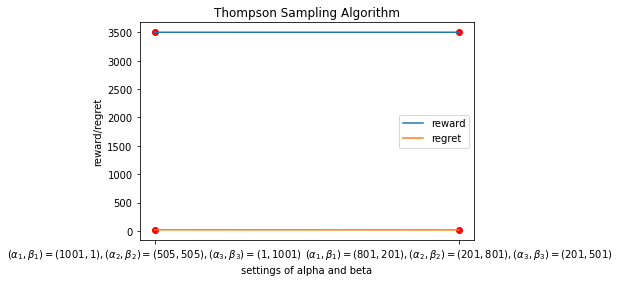

In [20]:
print("alpha = [1001, 505, 1] beta = [1, 505, 1001]    reward = ", rewards[0], " regret = ", regrets[0])
print("alpha = [801, 201, 201] beta = [201, 801, 501]  reward = ", rewards[1], " regret = ", regrets[1])

x = [r"$(a1,b1)=(1001,1),(\alpha_2,\beta_2)=(505,505),(a3,b3)=(1,1001)$",r"$(\alpha_1,\beta_1)=(801,201),(\alpha_2,\beta_2)=(201,801),(a3,b3)=(201,501)$"]
plt.plot(x,rewards)
plt.plot(x,regrets)
plt.scatter(x, rewards, c = 'red')
plt.scatter(x, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("settings of alpha and beta")
plt.ylabel("reward/regret")
plt.title("Thompson Sampling Algorithm")
plt.xticks(x)

4. Compute the gaps between the algorithm outputs (aggregated rewards over $N$ time slots) and the oracle value. Compare the numerical results of $\epsilon$-greedy, UCB, and TS.
   - Which one is the best?
   - Discuss the impacts of $\epsilon$, $c$, and $\alpha_{j}$, $\beta_{j}$, respectively. 

**Your anwser of problem 4 in Part I**

---
# Answer of Problem 4 in Part I
---

## 1. the epsilon-greedy algorithm

### <1> the original

| epsilon |   Reward  | Regret  |
|:-------:|:---------:|:-------:|
|   0.1   | 3401.04   | 96.26   |
|   0.5   | 3081.265  | 418.053 |
|   0.9   | 2749.715  | 755.148 |

### <2> further exploration
We can set that the $\epsilon$ changes as time changing, i.e. $\epsilon$ is a function of $t:\epsilon(t)$.

|   property    |     $\epsilon(t)$     |   Reward  | Regret  |
|:-------------:|:---------------------:|:---------:|:-------:|
| inverse ratio | $\dfrac{1}{t}$        | 3293.81   | 15.908  |
| linear        | $1-\dfrac{t-1}{N-1}$  | 3080.355  | 414.922 |
| log           | $\dfrac{1}{1+log(t)}$ | 3396.245  | 105.655 |
| exp           | $0.98^t$              | 3468.965  | 6.459   |

## 2. the UCB algorithm

### <1> the original

| c   |   Reward  | Regret  |
|:---:|:---------:|:-------:|
| 1   | 3405.905  | 82.049  |
| 5   | 2981.59   | 516.573 |
| 10  | 2826.27   | 672.834 |

### <2> further exploration

We can set that the $c$ changes as time changing, i.e. $c$ is a function of $t:c(t)$.

|   property    |       $\epsilon(t)$       |  Reward   | Regret  |
|:-------------:|:-------------------------:|:---------:|:-------:|
| inverse ratio | $1 + \dfrac{1}{t}$        | 3408.11   | 84.74   |
| linear        | $10 -\dfrac{9(t-1)}{N-1}$ | 3156.985  | 338.331 |
| log           | $1 + \dfrac{1}{1+log(t)}$ | 3396.215  | 107.731 |
| exp           | $1 + 0.95^t$              | 3411.185  | 84.462  |

## 3. the Thompson Sampling algorithm

### <1> the original

|                                     $\alpha,\beta$ setting                             |  Reward  | Regret |
|--------------------------------------------------------------------------------------|:--------:|:------:|
| (a1,b1)=(1,1),(a2,b2)=(1,1),(a3,b3)=(1,1)           | 3497.07  | 39.021 |
| (a1,b1)=(601,401),(a2,b2)=(401,601),(a3,b3)=(2,3)   | 3499.62  | 23.788 |

### <2> further exploration

If we set the prior settings of $\alpha,\beta$, we could find that the 

|                                      $\alpha,\beta$ setting                               |  Reward   | Regret |
|-----------------------------------------------------------------------------------------|:---------:|:------:|
| (a1,b1)=(1001,1),(a2,b2)=(505,505),(a3,b3)=(1,1001)    | 3501.8    | 20.565 |
| (a1,b1)=(801,201),(a2,b2)=(201,801),(a3,b3)=(201,501)  | 3502.31   | 17.802 |


# Which one is the best?

Comparing all rewards among the experiments we have done, we could find that the Thompson Sampling algorithm is the best one.

Using the given data in the problem, among all algorithm, we could find that the reward of the Thompson Sampling algorithm with parameter $\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)\}$ is the highest. And its reward is $3499.62$.

Using the our further exploration methods, among all algorithm, we could find that the reward of the Thompson Sampling algorithm with parameter $\{(\alpha_1,\beta_1)=(801,201),(\alpha_2,\beta_2)=(201,801),(\alpha_3,\beta_3)=(201,501)\}$ is the highest. And its reward is $3502.31$.

# Discuss the impacts of $\epsilon$, $c$, and $\alpha_{j}$, $\beta_{j}$, respectively.

## 1. the epsilon-greedy algorithm

In the epsilon-greedy algorithm, we have a parameter $\epsilon$ to decide the probability of exploration and exploitation.

As the desription, we may randomly choose an arm with probability of $\epsilon$, which symbolize the exploration. And we may choose the best arm we have found with probability of $1-\epsilon$, which symbolize the exploitation.

If we set $\epsilon$ to be a small value, we will have a high probability to exploit the best arm we have found. And we will have a low probability to explore other arms.

If we set $\epsilon$ to be a large value, we will have a high probability to explore other arms. And we will have a low probability to exploit the best arm we have found.

As the result, we could find that the reward of the epsilon-greedy algorithm with $\epsilon=0.1$ is the highest. And its reward is $3401.04$. Within a certain range, the less exploration, i.e. the less $\epsilon$ is, we could have a higher reward.

And in our further exploration, we could find that the reward of the epsilon-greedy algorithm with $\epsilon(t)=0.98^t$ is the highest. And its reward is $3468.965$. This could be understood that the exponential function decreased the most sharply. There is a turning point for exponential function. Before the corner point, the $\epsilon(t)$ decrease slowly, give it enough probability to explore. And after the corner point, the $\epsilon(t)$ will decrease sharply to a very small value in a short time. And we will have a high probability to exploit the best arm we have found. So it seems reasonable to have the best performance among all the experiments with epsilon-greedy algorithm.

## 2. the UCB algorithm

deduction of the UCB algorithm:

Since $reward_i\sim Bern(\hat{\theta}_i)$

According to Hoeffing's bound, we have
$$P(|\mu-\bar{\mu}|\geq\epsilon) \leq 2e^{\frac{-2n\epsilon^2}{(b-a)^2}}\leq 2e^{\frac{-n\epsilon^2}{2}}$$
Where $\bar{\mu}=\dfrac{1}{n}\sum\limits_ireward_i$, and $\mu$ be the mean of the distribution.

Take the confidence interval as $1-2\delta$

then we can get that $$2\delta = 2e^{\frac{-n\epsilon^2}{2}}$$
i.e. $$\epsilon = \sqrt{\frac{2}{n}ln(\frac{1}{\delta})}$$
And let $t$ be the turn, we can take $\delta = \dfrac{1}{t}$.

So we can get the exploration part of the UCB algorithm:
$$\sqrt{\dfrac{2log(t)}{count(i)}}$$
And we can give it a parameter $c$ to control the degree of exploration.

So the formula $$I(t) = \arg \max\limits_{j\in\{1,2,3\}}(\hat{\theta}_j+c\cdot \sqrt{\dfrac{2log(t)}{count(j)}})$$
Where the part $\hat{\theta}_j$ is for exploitation, and the part $c\cdot \sqrt{\dfrac{2log(t)}{count(j)}}$ is for exploration.

As the turn $t$ increase, the belief of the confidence increase, as it goes, the prediction gets more accurate.

As for $c$, it is the parameter the decribe the degree of exploration. As $c$ increase, It turns to be more likely to explore. Correspondingly, as $c$ decrease, it more likely to exploitation.

According to the given parameters, we could discover that $c=1$ is the best for the whole process, and in the certain range, the smaller the $c$ is, the better reward we will get. And the biggest rewards among given parameters is when $c=1$, the reward is $3405.905$.

And in our further exploration, we could find that the reward of the UCB algorithm with $c(t)=0.95^t$ is the highest. And its reward is $3411.185$. This could be understood that the exponential function decreased the most sharply. There is a turning point for exponential function. Before the corner point, the $c(t)$ decrease slowly, give it much bigger to explore. And after the corner point, the $c(t)$ will decrease sharply to much less for explore, which means more on exploitation. So it seems reasonable to have the best performance among all the experiments with UCB algorithm.

## 3. the Thompson Sampling algorithm

In the Thompson Sampling algorithm, we have a parameter $\alpha$ and $\beta$ to decide $\hat{\theta}_j$ as it $\sim Beta(\alpha,\beta)$.

The Thompson Sampling algorithm is somehow more like a Bayesian method. We have a prior belief of the distribution of the reward. And we update the belief according to the reward we get.

The initial parameters $\alpha$ and $\beta$ are the prior belief of the distribution of the reward. And we update the parameters according to the reward we get with the Beta-Binomial conjugate.

If we set $\alpha_j$ and $\beta_j$ to be a small value, we can regard that the prior tests time are less. i.e. with less prior tests, also less exploration.

If we set $\alpha_j$ and $\beta_j$ to be a large value, we can regard that the prior tests time are more. i.e. with more prior tests, also more exploration.

So the performance relay on the prior distrubution, i.e. the parameters' settings $\alpha_j$ and $\beta_j$.

In our experiences, we could discover that the more bigger we set, and the closer of the expectation we set to the Beta distribution, i.e. $\dfrac{\alpha_i}{\alpha_i+\beta_i}$ to the oracle value, the better performance we will get.

Although we may get better performance through adjusting the parameters, the difference is very small, and we still get the bset performance with Thompson Sampling algorithm than other algorithms. And the reward is $3505.345$. The regret always be very small.

5. Give your understanding of the exploration-exploitation trade-off in bandit algorithms.

**Your anwser of problem 5 in Part I**

---
# Answer of Problem 5 in Part I
---

Actually, initially we made some mistakes on understanding of the bandit algorithm. The understanding of $\theta,\hat{\theta}$ should be:

$\hat{\theta}_j$ is our evaluation of $\theta(j)$. In the Bandit model, the paremeter of mean reward $\theta$ is unknown, and it decides the reward we obtain. What we can know is our evaluation of $\theta$ , which is $\hat{\theta}$ and we decide our choice according our evaluation $\hat{\theta}$.

## Understandings of the exploration-exploitation trade-off in bandit algorithms

Exploration-Exploitation is a basic and popular topic in Reinforcement Learning. And it is also a very important topic in the bandit algorithm. 

At the beginning of playing with the bandit, we know nothing about the bandit. We have no idea about the reward of each arm. So we have to explore the bandit, gaining data from the previous decisions and feedbacks. Then get some information about the bandit. And then we can exploit the bandit according to the information we have got.

So the exploration-exploitation trade-off is the trade-off between exploration and exploitation. For exploration, we need to continue to explore, which means that we need to continue to gain data from the previous decisions and feedbacks. And for exploitation, we need to exploit the bandit according to the information we have got. Which means that we want to get the best reward according to the information we have got. So for exploit part, we combine what we obtained from the exploration part, and always make the best decision.

However, there must have a trade-off between exploration and exploitation. That is we have no idea how many times to explore, and when to start to exploit. If we always explore, we will never exploit to obtain better reward. And if we always exploit, we do not explore, and we may miss the best decision, go along the wrong way further and further.

So we need to find a balance between exploration and exploitation. And this is the exploration-exploitation trade-off.

Some simple and direct thought is to explore when the certainty of the information we have is not enough, and exploit when the certainty of the information we have is enough. However, this is not a good idea. Because we have no idea how many times we need to explore, and when to start to exploit. And we have no idea how to define the certainty of the information we have is enough.

So same simple but powerful algorithms are proposed to solve this problem. And these are what we have done to experiment above.

## The algorithms for exploration-exploitation trade-off

From all these experiments, we could discover that the rewards and the regrets among all the algorithms are somehow have some negative linear relationships. i.e. The more reward we get, the less regret we have. And the more regret we have, the less reward we get.

#### 1. epsilon-greedy algorithm
epsilon-greedy algorithm is a simple but effective method. The basic idea is that we have a parameter $\epsilon$ to control the degree of exploration. For each time, we have a probability $\epsilon$ to explore, and a probability $1-\epsilon$ to exploit. With $\epsilon$ to control the trade-off between exploration and exploitation. It have a fixed $\epsilon$ for the whole process. So exploration and exploitation may happened at all the time.

However, with human's experiment, we tend to do more exploration at the beginning, and do more exploitation at the end. So we can adjust the $\epsilon$ according to the turn $t$. And we have some experiments on this. And we could discover that if we let the $\epsilon$ decrease with the turn $t$ increase. i.e. more exploration at the beginning, and more exploitation at the end. We could get better performance. 

Among different decreasing strategies of $\epsilon$, we could discover that the $\epsilon$ decrease with the exponential function is the best. And the reward is $3405.905$.

#### 2. UCB algorithm

The UCB algorithm is base on the Hoeffding bound and the running turn to balance the exploration and exploitation. The basic idea is that we have a parameter $c$ to control the degree of exploration. And we deciding which arm to choose, it is seperate into the sum of two parts with different weights. One part is for exploitation, and the other part is for exploration. The parameter $c$, the running turn $t$, the the selection time of each arm works on the exoliration part to control the degree of exploration as a trade-off between exploration and exploitation. 

Also, as the turns increase, the weight of exploration part decrease to make more efforts on the exploitation part. And we have some experiments on this. The trade-off turns out to be explore at first as in the beginning, the exploration part usually have a bigger weight, and the trade-off turns out to be exploit at last as the turns increasing, the exploitation part usually have a bigger weight as time goes by.

We could discover that with given parameters, in the certain range, the less $c$ is symbolizes that less effect on the exploration part, has a better performance.

And we have done further experiments on this. We could discover that if we let the $c$ decrease with the turn $t$ increase. i.e. $c$ is a function of $t: c(t)$. And we control that $c(t)$ decreases as $t$ increaing to control the trade-off: more exploration at the beginning, and more exploitation at the end.

With experiments, we could discover that this get better performance. And we setting the decreasing function as an exponential function. And the reward is the highest among the UCB algorithm. 

#### 3. Thompson Sampling algorithm

As for the Thompson Sampling algorithm, its trade-off somehow more like the Bayes' Inference with the Beta-Binomial conjugency.

The parameters' settings $\alpha_i$ and $\beta_i$ can be regard as the prior distribution of each arm to control the degree of exploration. And we have a Beta distribution for each arm. And we sample a value from each Beta distribution, and choose the arm with the biggest value. And we update the Beta distribution of the arm we choose according to the feedback we get. This can be seen as we get the posterior distribution.

So we can see that the Thompson Sampling algorithm as a trade-off between the prior distribution and the posterior distribution. So we can see that the Beta distribution is the trade-off between the prior distribution and the posterior distribution.

As we all know, the Bayes Inference gets a better performance with more data. And we have some experiments on this.

Usually, when setting the parameter as prior distribution have a bigger number, which means that we implictly told the model that we have already done more experiment before. So if the parameter is suitable to the oracle, we can get a better performance. And we can see that the Beta distribution is the trade-off between the exploration and the exploitation.

And among these algorithms, with experimental provement, we can discover that the Thompson Sampling algorithm is always the best one. Although adjusting the parameters only make a little difference to the reward, but it is always the best one.

## Summary

Above all, each algorithm has there own advantages, and they all have their unique method the deal with the trade-off between exploration and exploitation to chase for a better performance. 

The performance among different algorithm may various a lot, so we need to decide to choose the correct model when solving the problems. And gain the advantages from each algorithm. The algorithms all teach us the knowledge of trade-off. Not only in the bandit algorithm, but also in the real life. We need to find a balance between exploration and exploitation.

Also, the parameters in the algorithms are also playing very important role in it. Even if we choose the best method, the best algorithm, we still need to adjust the parameters to get the best performance. And this is also somehow a trade-off. We should not only focus on the algorithm, but also the parameters. In real life, we not only need to find the best method, but also need to find the best parameters. Find the best choise of method, then work on hard to find the best parameters of life. 

6. We implicitly assume the reward distribution of these three arms are independent. How about the dependent case?
	Can you design an algorithm to exploit such information to obtain a better result?

**Your anwser of problem 6 in Part I**

---
# Answer of Problem 6 in Part I
---

Settings:

Suppose that the arm1 and the arm2 are not independent on the reward distribution. And the arm3 is independent on the reward distribution of the arm1 and the arm2.

To be more specific, we can assume that the success probability of the arm1 is always same as the success probability of the arm2. And the success probability of the arm3 is independent with the arm1 and arm2.

Our algorithm:
Similar to the Thompson Sampling algorithm, we can assume that the arm1 and the arm2 have the same Beta distribution. And the arm3 has another Beta distribution.

However, if we have chosen the arm1 or arm2, no matter it success or not, we do the effect on both of their distribution.

To be more specific, if we choose the arm1, we update the Beta distribution of the arm1 and the arm2. And if we choose the arm2, we update the Beta distribution of the arm1 and the arm2. And if we choose the arm3, we only update the Beta distribution of the arm3.

This make sure that the arm1 and arm2 always have the same distribution.

Another advantage of ours algorithm is that this could greatly speed up the convergence speed. As the arm1 and arm2 always have the same distribution, we can get more information from the arm1 and arm2. And it also help the algorithm turn to choose better arm.

If arm1, arm2 is the worst arm, the algorithm helps to turn to choose arm3 much more quickly. And if arm1, arm2 is the best arm, the algorithm helps to turn to choose arm1 or arm2 much more quickly.

This helps to have a better and quickly exploration mode, which saves more effect on accurate exploitation. This can help us get the better reward.

---
# 1. The epsilon-greedy algorithm

In [86]:
### Your code for problem 1.6. Feel free to insert more blocks or helper functions if you need.
def greedy_dependence(n, epsilon):
    # here is the difference between greedy_dependence and greedy_independence
    theta_oracled = [0, 0.7, 0.7, 0.4] # the oracled theta of each arm

    global count, theta
    init_greedy() # initialize the count and theta of each arm

    sum_theta = 0

    for t in range(1, n + 1): # the time slot
        prob = random.random() # return value is in [0, 1)
        arm = None # the arm to be chosen
        if prob < epsilon: # explore (with probability epsilon)
            arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        else: # exploit (with probability 1 - epsilon)
            arm = np.argmax(theta) # choose the best arm
            if arm == 0: # if this happened, it means that all the theta are 0
                # so we can randomly choose an arm from {1,2,3}
                arm = random.randint(1, 3) # randomly choose an arm from {1,2,3}
        
        # print("time slot: ", t, " arm: ", arm)
        sum_theta += theta[arm] # update the sum of theta
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

In [88]:
epsilon = [0.1, 0.5, 0.9]
rewards = [0, 0, 0]
regrets = [0, 0, 0]

for i in range(3):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = greedy_dependence(N, epsilon[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:05<00:00, 37.56it/s]


epsilon =  0.1  reward =  3450.460000000001  regret =  53.24274685561764
epsilon =  0.5  reward =  3253.53  regret =  260.0889706305517
epsilon =  0.9  reward =  3050.634999999999  regret =  484.0529433565397


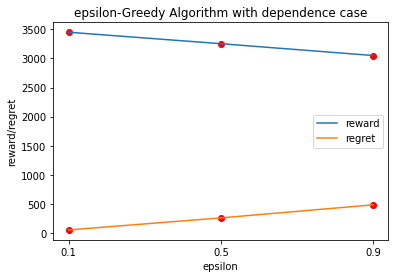

In [89]:
# plot the result
for i in range(len(epsilon)):
    print("epsilon = ", epsilon[i], " reward = ", rewards[i], " regret = ", regrets[i])

plt.plot(epsilon,rewards)
plt.plot(epsilon,regrets)
plt.scatter(epsilon, rewards, c = 'red')
plt.scatter(epsilon, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("epsilon")
plt.ylabel("reward/regret")
plt.title("epsilon-Greedy Algorithm with dependence case")
plt.xticks(epsilon);

---
# 2. The UCB Algorithm

In [90]:
def UCB_dependence(n, c):
    # here is the difference between greedy_dependence and greedy_independence
    theta_oracled = [0, 0.7, 0.7, 0.4] # the oracled theta of each arm

    global count, theta
    init_UCB() # initialize the count and theta of each arm
    sum_theta = theta[1] + theta[2] + theta[3]
    
    for t in range(4, n + 1):
        arm = np.argmax([theta[i] + c * math.sqrt(2 * math.log(t) / count[i]) for i in range(1, 4)]) + 1
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])
        
        count[arm] += 1 # update the count of the chosen arm
        theta[arm] += 1 / count[arm] * (r_i - theta[arm]) # update the theta of the chosen arm
    
        sum_theta += theta[arm]

    reward = count[1] * theta[1] + count[2] * theta[2] + count[3] * theta[3] # the expectation of the reward
    regret = n * np.max(theta) - sum_theta # the regret
    return reward, regret # return the total reward and regret

In [91]:
c = [1, 5, 10]
rewards = [0, 0, 0]
regrets = [0, 0, 0]

for i in range(3):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = UCB_dependence(N, c[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:13<00:00, 15.00it/s]


c =  1  reward =  3463.879999999997  regret =  54.96728561127044
c =  5  reward =  3268.4549999999995  regret =  257.52685588443836
c =  10  reward =  3166.41  regret =  366.0323053320077


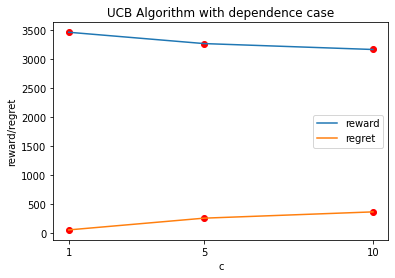

In [93]:
# plot the result
for i in range(len(c)):
    print("c = ", c[i], " reward = ", rewards[i], " regret = ", regrets[i])

plt.plot(c,rewards)
plt.plot(c,regrets)
plt.scatter(c, rewards, c = 'red')
plt.scatter(c, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("c")
plt.ylabel("reward/regret")
plt.title("UCB Algorithm with dependence case")
plt.xticks(c);

---
# 3. The Thompson Sampling Algorithm

In [113]:
def TS_dependent(n, a, b):
    # here is the difference between greedy_dependence and greedy_independence
    theta_oracled = [0, 0.7, 0.7, 0.4] # the oracled theta of each arm
    
    global count, theta
    init_TS()
    reward = 0 # the expectation of the reward
    sum_theta = 0 # the sum of theta
    max_theta = 0 # the max theta

    for t in range(1, n + 1):
        for i in range(1, 4):
            theta[i] = np.random.beta(a[i], b[i]) # theta[i] ~ Beta(a[i], b[i])
        arm = np.argmax(theta[1:4]) + 1 # choose the best arm
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        a[arm] += r_i # update a[arm]
        b[arm] += 1 - r_i # update b[arm]

        reward += r_i # update the expectation of the reward
        sum_theta += theta[arm] # update the sum of theta
        max_theta = np.max([max_theta, np.max(theta[1:4])]) # update the max theta
    
    regret = n * max_theta - sum_theta # the regret
    return reward, regret # return the total reward and regret

In [114]:
a = [[0, 1, 1, 1], [0, 601, 401, 2]]
b = [[0, 1, 1, 1], [0, 401, 601, 3]]

rewards = [0, 0]
regrets = [0, 0]
for i in range(2):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = TS_dependent(N, a[i], b[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:32<00:00,  6.07it/s]


alpha = [1, 1, 1]     beta = [1, 1, 1]      reward =  3491.2349999999997  regret =  43.40277498209265
alpha = [601, 401, 2] beta = [401, 601, 3]  reward =  3489.970000000001  regret =  28.22124385075352


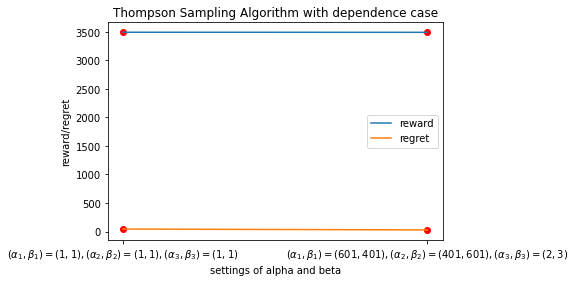

In [115]:
# plot the result
print("alpha = [1, 1, 1]     beta = [1, 1, 1]      reward = ", rewards[0], " regret = ", regrets[0])
print("alpha = [601, 401, 2] beta = [401, 601, 3]  reward = ", rewards[1], " regret = ", regrets[1])

x = [r"$(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)$",r"$(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)$"]
plt.plot(x,rewards)
plt.plot(x,regrets)
plt.scatter(x, rewards, c = 'red')
plt.scatter(x, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("settings of alpha and beta")
plt.ylabel("reward/regret")
plt.title("Thompson Sampling Algorithm with dependence case")
plt.xticks(x);

---
# 4. Ours Algorithm 

In [102]:
def ours_algorithm(n, a, b):
    # here is the difference between greedy_dependence and greedy_independence
    theta_oracled = [0, 0.7, 0.7, 0.4] # the oracled theta of each arm
    
    global count, theta
    init_TS()
    reward = 0 # the expectation of the reward
    sum_theta = 0 # the sum of theta
    max_theta = 0 # the max theta

    for t in range(1, n + 1):
        for i in range(1, 4):
            theta[i] = np.random.beta(a[i], b[i]) # theta[i] ~ Beta(a[i], b[i])
        arm = np.argmax(theta[1:4]) + 1 # choose the best arm
        r_i = np.random.binomial(1, theta_oracled[arm]) # r_i ~ Bern(theta_oracled[arm])

        if arm == 1:
            a[1] += r_i # update a[1]
            b[1] += 1 - r_i # update b[1]
            a[2] += r_i # update a[2]
            b[2] += 1 - r_i # update b[2]
        
        if arm == 2:
            a[1] += r_i # update a[1]
            b[1] += 1 - r_i # update b[1]
            a[2] += r_i # update a[2]
            b[2] += 1 - r_i # update b[2]

        reward += r_i # update the expectation of the reward
        sum_theta += theta[arm] # update the sum of theta
        max_theta = np.max([max_theta, np.max(theta[1:4])]) # update the max theta
    
    regret = n * max_theta - sum_theta # the regret
    return reward, regret # return the total reward and regret  

In [103]:
a = [[0, 1, 1, 1], [0, 601, 401, 2], [0, 1001, 505, 1], [0, 801, 201, 201]]
b = [[0, 1, 1, 1], [0, 401, 601, 3], [0, 1, 505, 1001], [0, 201, 801, 501]]

rewards = [0, 0, 0, 0]
regrets = [0, 0, 0, 0]
for i in range(4):
    for _ in tqdm.tqdm(range(repeat_time)):
        reward, regret = TS_dependent(N, a[i], b[i])
        rewards[i] += reward / repeat_time
        regrets[i] += regret / repeat_time

100%|██████████| 200/200 [00:34<00:00,  5.88it/s]


alpha = [1, 1, 1]       beta = [1, 1, 1]        reward =  3498.44  regret =  40.013707732760615
alpha = [601, 401, 2]   beta = [401, 601, 3]    reward =  3505.185  regret =  18.55745501571552
alpha = [1001, 505, 1]  beta = [1, 505, 1001]   reward =  3500.5899999999992  regret =  20.64101950800044
alpha = [801, 201, 201] beta = [201, 801, 501]  reward =  3500.819999999999  regret =  18.18319178180341


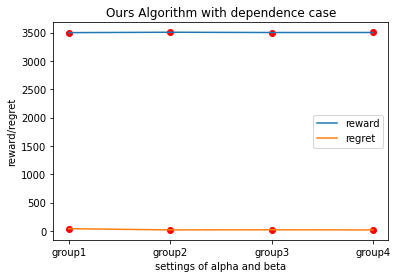

In [104]:
# plot the result
print("alpha = [1, 1, 1]       beta = [1, 1, 1]        reward = ", rewards[0], " regret = ", regrets[0])
print("alpha = [601, 401, 2]   beta = [401, 601, 3]    reward = ", rewards[1], " regret = ", regrets[1])
print("alpha = [1001, 505, 1]  beta = [1, 505, 1001]   reward = ", rewards[2], " regret = ", regrets[2])
print("alpha = [801, 201, 201] beta = [201, 801, 501]  reward = ", rewards[3], " regret = ", regrets[3])

x = ["group1","group2","group3","group4"]

plt.plot(x,rewards)
plt.plot(x,regrets)
plt.scatter(x, rewards, c = 'red')
plt.scatter(x, regrets, c = 'red')

plt.legend(["reward", "regret"])
plt.xlabel("settings of alpha and beta")
plt.ylabel("reward/regret")
plt.title("Ours Algorithm with dependence case")
plt.xticks(x);

---
# Summary

Firstly for the simple algorithms, we just use the given parameters with three algorithms to see the performance.

Notice that we have slightly modified the algorithms to fit our settings.

And the performance is as follows:

#### 1. epsilon-greedy algorithm

| epsilon |   Reward  | Regret  |
|:-------:|:---------:|:-------:|
|   0.1   | 3450.46   | 53.243  |
|   0.5   | 3253.53   | 260.089 |
|   0.9   | 3050.635  | 484.053 |

#### 2. UCB algorithm

| c   |   Reward  | Regret  |
|:---:|:---------:|:-------:|
| 1   | 3463.88   | 54.967  |
| 5   | 3268.455  | 257.527 |
| 10  | 3166.41   | 366.032 |

#### 3. Thompson Sampling algorithm

|                         $\alpha,\beta$ setting                                         |  Reward  | Regret |
|--------------------------------------------------------------------------------------|:-----------------:|:-----------:|
| (a1,b1)=(1,1),(a2,b2)=(1,1),(a3,b3)=(1,1)           | 3491.235 | 43.403 |
| (a1,b1)=(601,401),(a2,b2)=(401,601),(a3,b3)=(2,3)   | 3489.97  | 28.221 |

#### 4. Our algorithm

|                           $\alpha,\beta$ setting                                         |  Reward  | Regret |
|----------------------------------------------------------------------------------------|:--------:|:------:|
| (a1,b1)=(1,1),(a2,b2)=(1,1),(a3,b3)=(1,1)$            | 3498.44  | 40.014 |
| (a1,b1)=(601,401),(a2,b2)=(401,601),(a3,b3)=(2,3)     | 3505.185 | 18.557 |
| (a1,b1)=(1001,1),(a2,b2)=(505,505),(a3,b3)=(1,1001)   | 3500.59  | 20.641 |
| (a1,b1)=(801,201),(a2,b2)=(201,801),(a3,b3)=(201,501) | 3500.82  | 18.183 |

From comparison, we could discover that with the original algorithms, the best reward we can get is $3491.235$.

However, with ours algorithm's optimize, we can get the best reward $3505.185$.

With the experimental provement, it seems that our algorithm true improves the reward. And could better solve the dependent case.

## Part II: Bayesian Bandit Algorithms

There are two arms which may be pulled repeatedly in any order.
Each pull may result in either a success or a failure.
The sequence of successes and failures which results from pulling arm $i$ ($i \in \{1, 2\}$) forms a Bernoulli process with unknown success probability $\theta_{i}$.
A success at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), while an unsuccessful pull yields a zero reward.
At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.
These prior distributions are updated to posterior distributions as arms are pulled.
Since the class of Beta distributions is closed under Bernoulli sampling, posterior distributions are all Beta distributions.
How should the arm to pull next in each time slot be chosen to maximize the total expected reward from an infinite sequence of pulls?

1. 	One intuitive policy suggests that in each time slot we should pull the arm for which the current expected value of $\theta_{i}$ is the largest.
	This policy behaves very good in most cases.
	Please design simulations to check the behavior of this policy.

**Your anwser of problem 1 in Part II**

---
# Answer of Problem 1 in Part II
---

In [71]:
### Your code for problem 2.1. Feel free to insert more blocks or helper functions if you need.
alpha = [0, 1, 1]
beta = [0, 1, 1]

theta_oracled_twoarm = [0, 0.7, 0.5]

def intuitive(gamma):
    gamma_pow = 1
    reward = 0
    for t in (range(1, N + 1)):
        mean1 = alpha[1] / (alpha[1] + beta[1])
        mean2 = alpha[2] / (alpha[2] + beta[2])
        if mean1 > mean2:
            arm = 1
        elif mean1 < mean2:
            arm = 2
        else:
            arm = np.random.choice([1, 2])
                
        r_i = np.random.binomial(1, theta_oracled_twoarm[arm]) # r_i ~ Bern(theta_oracled[arm])
        if r_i == 1:
            alpha[arm] += 1
            reward += gamma_pow
        else:
            beta[arm] += 1
        gamma_pow *= gamma
        
    return reward

In [74]:
Gamma = [0.3, 0.6, 0.9]
reward = [0] * 9
cnt = 0

for i in range(3):
    for gamma in Gamma:
        if i == 0:
            alpha = [0, 2, 1]
            beta = [0, 1, 1]
        elif i == 1:
            alpha = [0, 1, 1]
            beta = [0, 1, 1]
        else:
            alpha = [0, 1, 2]
            beta = [0, 1, 1]

        import tqdm
        for _ in tqdm.tqdm(range(repeat_time)):
           reward[cnt] += intuitive(gamma) / repeat_time
           
        cnt += 1

100%|██████████| 200/200 [00:03<00:00, 53.46it/s]


In [76]:
cnt = 0

for i in range(3):
    for gamma in Gamma:
        st = '<'
        if i == 0:
            st = '>'
        elif i == 1:
            st = '='
        else:
            st = '<'

        print("initial status: ", st, " gamma = ", gamma, " reward = ", reward[cnt])
        cnt += 1

initial status:  >  gamma =  0.3  reward =  0.9487811095294503
initial status:  >  gamma =  0.6  reward =  1.5778619422661007
initial status:  >  gamma =  0.9  reward =  6.344893300030334
initial status:  =  gamma =  0.3  reward =  0.6944351184584632
initial status:  =  gamma =  0.6  reward =  1.6556860867528636
initial status:  =  gamma =  0.9  reward =  6.342779593417824
initial status:  <  gamma =  0.3  reward =  0.8936474025071289
initial status:  <  gamma =  0.6  reward =  1.5671361181984642
initial status:  <  gamma =  0.9  reward =  6.372336031373596


We set the oracled value of the two arms be 0.7 for the first arm, and 0.5 for the second arm.

We can have different settings for the parameters of the Beta distribution of the two arms.

- Set ">" means that the arm1 is more likely tobe chosen first.

    i.e. Initially let $\theta_1\sim Beta(2,1)$, $\theta_2\sim Beta(1,1)$

- Set "=" means that the arm1 and the arm2 are equally likely tobe chosen first.

    i.e. Initially let $\theta_1\sim Beta(1,1)$, $\theta_2\sim Beta(1,1)$

- Set "<" means that the arm2 is more likely tobe chosen first.

    i.e. Initially let $\theta_1\sim Beta(1,1)$, $\theta_2\sim Beta(2,1)$

We can also set the line factor $\gamma$ into different values.

To have some bigger difference, we can take $\gamma = 0.99, 0.9, 0.5$ respectively.

And here is the result:

| initial status, $\gamma$|   0.3    |   0.6   |    0.9   |
|:-----------------------:|:--------:|:-------:|:--------:|
|             >           |  0.949   |  1.578  |  6.345   | 
|             =           |  0.694   |  1.656  |  6.343   |
|             <           |  0.894   |  1.567  |  6.372   |

2. However, such intuitive policy is unfortunately not optimal.
	Please provide an example to show why such policy is not optimal. 

**Your anwser of problem 2 in Part II**

---
# Answer of Problem 2 in Part II
---

One situation is that when the 2 probability comes to be relatively close, we have that this algorithm will fail to give an optimal solution. 

Given an situation where $p_1$ = 0.8, $p_2$ = 0.7, by simulation, we will found out that the final probability of success is only about 0.8 which is closer to the smaller probability $p_2$ instead of the larger probability $p_3$, which is not optimal. 

The following are code that simulate this situation.

In [116]:
alpha = [0, 1, 1]
beta =  [0, 1, 1]

def close_prob_sim(p1, p2, gamma, N = 1000):
    # the res[0] is the number of the cases that our algorithm gets greater reward. 
    res = [0, 0]
    est_p1 = p1 / (1 - gamma) # est_p1(arm1) is the better reward
    est_p2 = p2 / (1 - gamma) # est_p2(arm2) is the worse reward
    for i in range(N):
        reward = intuitive(gamma)

        if (abs(reward - est_p1) < abs(reward - est_p2)):
            res[0] += 1

        if (abs(reward - est_p1) > abs(reward - est_p2)):
            res[1] += 1
    return res

est_res = close_prob_sim(0.8, 0.7, 0.9, 1000)
print("The number of cases that the final case converge to ideal case: ", est_res[0])
print("The number of cases that the final case converge to non-ideal case: ", est_res[1])

The number of cases that the final case converge to ideal case:  87
The number of cases that the final case converge to non-ideal case:  913


In the code, we estimate the expectation reward by giving $reward = \dfrac{p_i}{1 - \gamma}$ when the simulation number is larger enough if we stick to one arm. Then by compare the reward from the algorithm, we will determine which case the current simulation falls into.

From the code simulation, we can find out that the among the 1000 times simulation, most cases fall into the non-ideal cases, which is actually: when we choose the arm with probability 0.8 and we make success, then the algothrim tends to give choice that the arm with probability 0.8 is more likely to win as another arm hasn't beed shaked so is probability 0.5 to win. Therefore we actually falls into a case that we stick to one arm with lower win probability 0.8.

So the number of getting the better arm is only 87 times, and the number of getting the worse arm is 913 times. 

So it chooses much more worse arm than the better arm, which is not optimal.

So we could say that we have given a case to show that such policy is not optimal.

3. For the expected total reward under an optimal policy, show that the following recurrence equation holds:

\begin{equation*}
		\begin{aligned}
			R_{1}(\alpha_{1},\beta_{1}) 
			= & \frac{\alpha_{1}}{\alpha_{1}+\beta_{1}} [1+\gamma R(\alpha_{1} + 1, \beta_{1}, \alpha_{2}, \beta_{2})] \\
				& + \frac{\beta_{1}}{\alpha_{1} + \beta_{1}} [\gamma R(\alpha_{1}, \beta_{1} + 1, \alpha_{2}, \beta_{2})]; \\
			R_{2}(\alpha_{2}, \beta_{2}) 
			= & \frac{\alpha_{2}}{\alpha_{2} + \beta_{2}} [1 + \gamma R(\alpha_{1}, \beta_{1}, \alpha_{2} + 1, \beta_{2})] \\
				& + \frac{\beta_{2}}{\alpha_{2} + \beta_{2}} [\gamma R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2} + 1)]; \\
			R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2}) 
			= & \max \left\{ R_{1}(\alpha_{1}, \beta_{1}), R_{2}(\alpha_{2}, \beta_{2}) \right\}.
		\end{aligned}  	
	\end{equation*}

**Your anwser of problem 3 in Part II**

---
# Answer of Problem 3 in Part II
---

At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.

1. Pull the first arm.

If we pull the arm 1 at the $t^{th}$ time, since it success or not is a distribution that is $Bern(\theta_1)$.

So with given $\theta_1$, it will yield a reward $\gamma^{t-1}$ when success with probability $\theta_1$, and yield a reward 0 when failure with probability $1-\theta_1$.

Since its Bayesian Inferece, with Beta-Binoimal conjugate, so the posterior distribution of $\theta_1$ is still a Beta distribution, which is $Beta(\alpha_1+1,\beta_1)$ when success, and $Beta(\alpha_1,\beta_1+1)$ when failure.
So the next steps' rewards is $R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$ when success at this time, and $R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$ when failure at this time.

Since at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), which means that the future's reward is will recieve a discount $\gamma$ for each time.

<1> sucess at this time
So for this time, if it sucess, we can recieve the reward $1$. And the parameters become $(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$ due to the Beta-Binoimal conjugate. After the discount, the future's reward is $\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$.

Also, since success happens with probability $\theta_1$. So the total rewards when success at this time is $$\theta_1[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]$$

<2> failure at this time
For this time, if it fail, we can recieve the reward $0$. And the parameters become $(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$ due to the Beta-Binoimal conjugate. After the discount, the future's reward is $0+\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$.

Also, since failure happens with probability $1-\theta_1$. So the total rewards when success at this time is $$(1-\theta_1)[0+\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]=(1-\theta_1)[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$

So combine the two parts, we can get that the total rewards when pull the first arm is that 
$$R_1(\alpha_1,\beta_1)=\theta_1[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+(1-\theta_1)[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$

2. Pull the second arm.
Since $\theta_2\sim Beta(\alpha_2,\beta_2)$, and others are the same as the first arm, so the total rewards when pull the second arm is that
$$R_2(\alpha_2,\beta_2)=\theta_2[1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2)]+(1-\theta_2)[\gamma R(\alpha_1,\beta_1,\alpha_2,\beta_2+1)]$$

So combine all analysis above, we can get that:
$$R_1(\alpha_1,\beta_1)=E(R_1(\alpha_1,\beta_1;\theta_1))$$
$$=E(\theta_1[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+(1-\theta_1)[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)])$$

Since $\theta_1\sim Beta(\alpha_1, \beta_1)$, so
$$E(\theta_1)=\dfrac{\alpha_1}{\alpha_1+\beta_1},E(1-\theta_1)=1-\dfrac{\alpha_1}{\alpha_1+\beta_1}=\dfrac{\beta_1}{\alpha_1+\beta_1}$$
And with the linearity of the expectation, we can get that
$$R_1(\alpha_1,\beta_1)=\dfrac{\alpha_1}{\alpha_1+\beta_1}[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+\dfrac{\beta_1}{\alpha_1+\beta_1}[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$

Similarly, since $$\theta_2\sim Beta(\alpha_2,\beta_2)$$
So with the same method above, we can get that:
$$R_2(\alpha_2,\beta_2)=\dfrac{\alpha_2}{\alpha_2+\beta_2}[1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2)]+\dfrac{\beta_2}{\alpha_2+\beta_2}[\gamma R(\alpha_2,\beta_1,\alpha_2,\beta_2+1)]$$

And since we want to maximize the total reward, so we can get that:
$$R(\alpha_1,\beta_1,\alpha_2,\beta_2)=\max\{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\}$$

So above all, the following recurrence equation holds have been proven.
$$R_1(\alpha_1,\beta_1)=\dfrac{\alpha_1}{\alpha_1+\beta_1}[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+\dfrac{\beta_1}{\alpha_1+\beta_1}[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$
$$R_2(\alpha_2,\beta_2)=\dfrac{\alpha_2}{\alpha_2+\beta_2}[1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2)]+\dfrac{\beta_2}{\alpha_2+\beta_2}[\gamma R(\alpha_2,\beta_1,\alpha_2,\beta_2+1)]$$
$$R(\alpha_1,\beta_1,\alpha_2,\beta_2)=\max\{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\}$$

4. For the above equations, how to solve it exactly or approximately? 

**Your anwser of problem 4 in Part II**

---
# Answer of Problem 4 in Part II
---

We could solve the recursive equations by recursively calling the following function.

However, since the number of states is too large, and there is no boundary of it. So it is impossible for us to solve it exactly.

So we use the approximate method to solve it.

In our code, we set up a counter as the polling times. 

We regard that after polling more than 50 times, the exploration is enough. So we just use the mean value of the two arms to exploitation. We just choose the arm with the bigger mean.

And since $\theta_1\sim Beta(\alpha_1,\beta_1), \theta_2\sim Beta(\alpha_2,\beta_2)$

So their mean is $\dfrac{\alpha_1}{\alpha_1+\beta_1}$ and $\dfrac{\alpha_2}{\alpha_2+\beta_2}$ respectively.

A small optimization is that we can use a dictionary to store the value of the states we have already calculated, which is somehow like the memoization search in the Dynamic programming.

So that we can avoid the repeated calculation.

This could greatly speed up our calculation. Because there are too many states appearing with many times.

In [67]:
### Your code for problem 2.4 if needed.
dict = {}

# the first return value ois the calculated R, and the second parameter is which arm to pull
def R(a1, b1, a2, b2, gamma, count):
   if ((a1, a2, b1, b2) in dict): # if the value is already in the dictionary
      return dict[(a1, a2, b1, b2)]
   
   # bound condition
   # suppose that exploration 1000 times is enough for exploitation
   if (count > 50):
      mean1 = a1 / (a1 + b1)
      mean2 = a2 / (a2 + b2)
      if (mean1 > mean2):
         return mean1
      else:
         return mean2

   # transfer fuction
   R1 = a1 / (a1 + b1) * (1 + gamma * R(a1 + 1, b1, a2, b2, gamma, count + 1)) \
      + b1 / (a1 + b1) * (gamma * R(a1, b1 + 1, a2, b2, gamma, count + 1))
    
   R2 = a2 / (a2 + b2) * (1 + gamma * R(a1, b1, a2 + 1, b2, gamma, count + 1)) \
      + b2 / (a2 + b2) * (gamma * R(a1, b1, a2, b2 + 1, gamma, count + 1))

   if (R1 > R2):
      reward = R1
   else:
      reward = R2

   dict[(a1, a2, b1, b2)] = reward # store the value in the dictionary
   return reward

5. Find the optimal policy.

**Your anwser of problem 5 in Part II**

---
# Answer of Problem 5 in Part II
---

In [68]:
### Your code for problem 2.5. Feel free to insert more blocks or helper functions if you need.
for i in range(3):
    for gamma in Gamma:
        dict = {}

        st = '<'
        reward = 0
        if i == 0:
            st = '>'
            reward = R(2, 1, 1, 1, gamma, 0)
        elif i == 1:
            st = '='
            reward = R(1, 1, 1, 1, gamma, 0)
        else:
            st = '<'
            reward = R(1, 1, 2, 1, gamma, 0)

        print("initial status: ", st, " gamma = ", gamma, " reward = ", reward)

initial status:  >  gamma =  0.3  reward =  0.9560636761818573
initial status:  >  gamma =  0.6  reward =  1.6956868923275288
initial status:  >  gamma =  0.9  reward =  7.017004905451993
initial status:  =  gamma =  0.3  reward =  0.7511060864204415
initial status:  =  gamma =  0.6  reward =  1.3925460802750254
initial status:  =  gamma =  0.9  reward =  6.069113200947215
initial status:  <  gamma =  0.3  reward =  0.9560636761818573
initial status:  <  gamma =  0.6  reward =  1.6956868923275288
initial status:  <  gamma =  0.9  reward =  7.017004905451993


The optimal policy:

When the pulling turn is more than $50$ times, we choose the arm with the bigger expection.

Otherwise, we can firstly calculate the $R_1,R_2$ of each arm, then choose the arm with the bigger $R_i$.

With similar settings with problem1 i part II, we can get the optimal result using the optimal policy.

The optimal table:

| initial status, $\gamma$|   0.3    |   0.6   |    0.9   |
|:-----------------------:|:--------:|:-------:|:--------:|
|             >           |  0.956   |  1.696  |  7.017   | 
|             =           |  0.751   |  1.393  |  6.069   |
|             <           |  0.956   |  1.696  |  7.017   |

To compare with the result in problem1, we can take the table in Problem1 in PartII.

That table is as follows:

The origin table:

| initial status, $\gamma$|   0.3    |   0.6   |    0.9   |
|:-----------------------:|:--------:|:-------:|:--------:|
|             >           |  0.949   |  1.578  |  6.345   | 
|             =           |  0.694   |  1.656  |  6.343   |
|             <           |  0.894   |  1.567  |  6.372   |

As comparison, we can see that the optimal policy truely improve the performance of the system.

So with the above optimal policy, we could get the optimal result.